In [3]:
import seaborn as sns
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import ast
import os


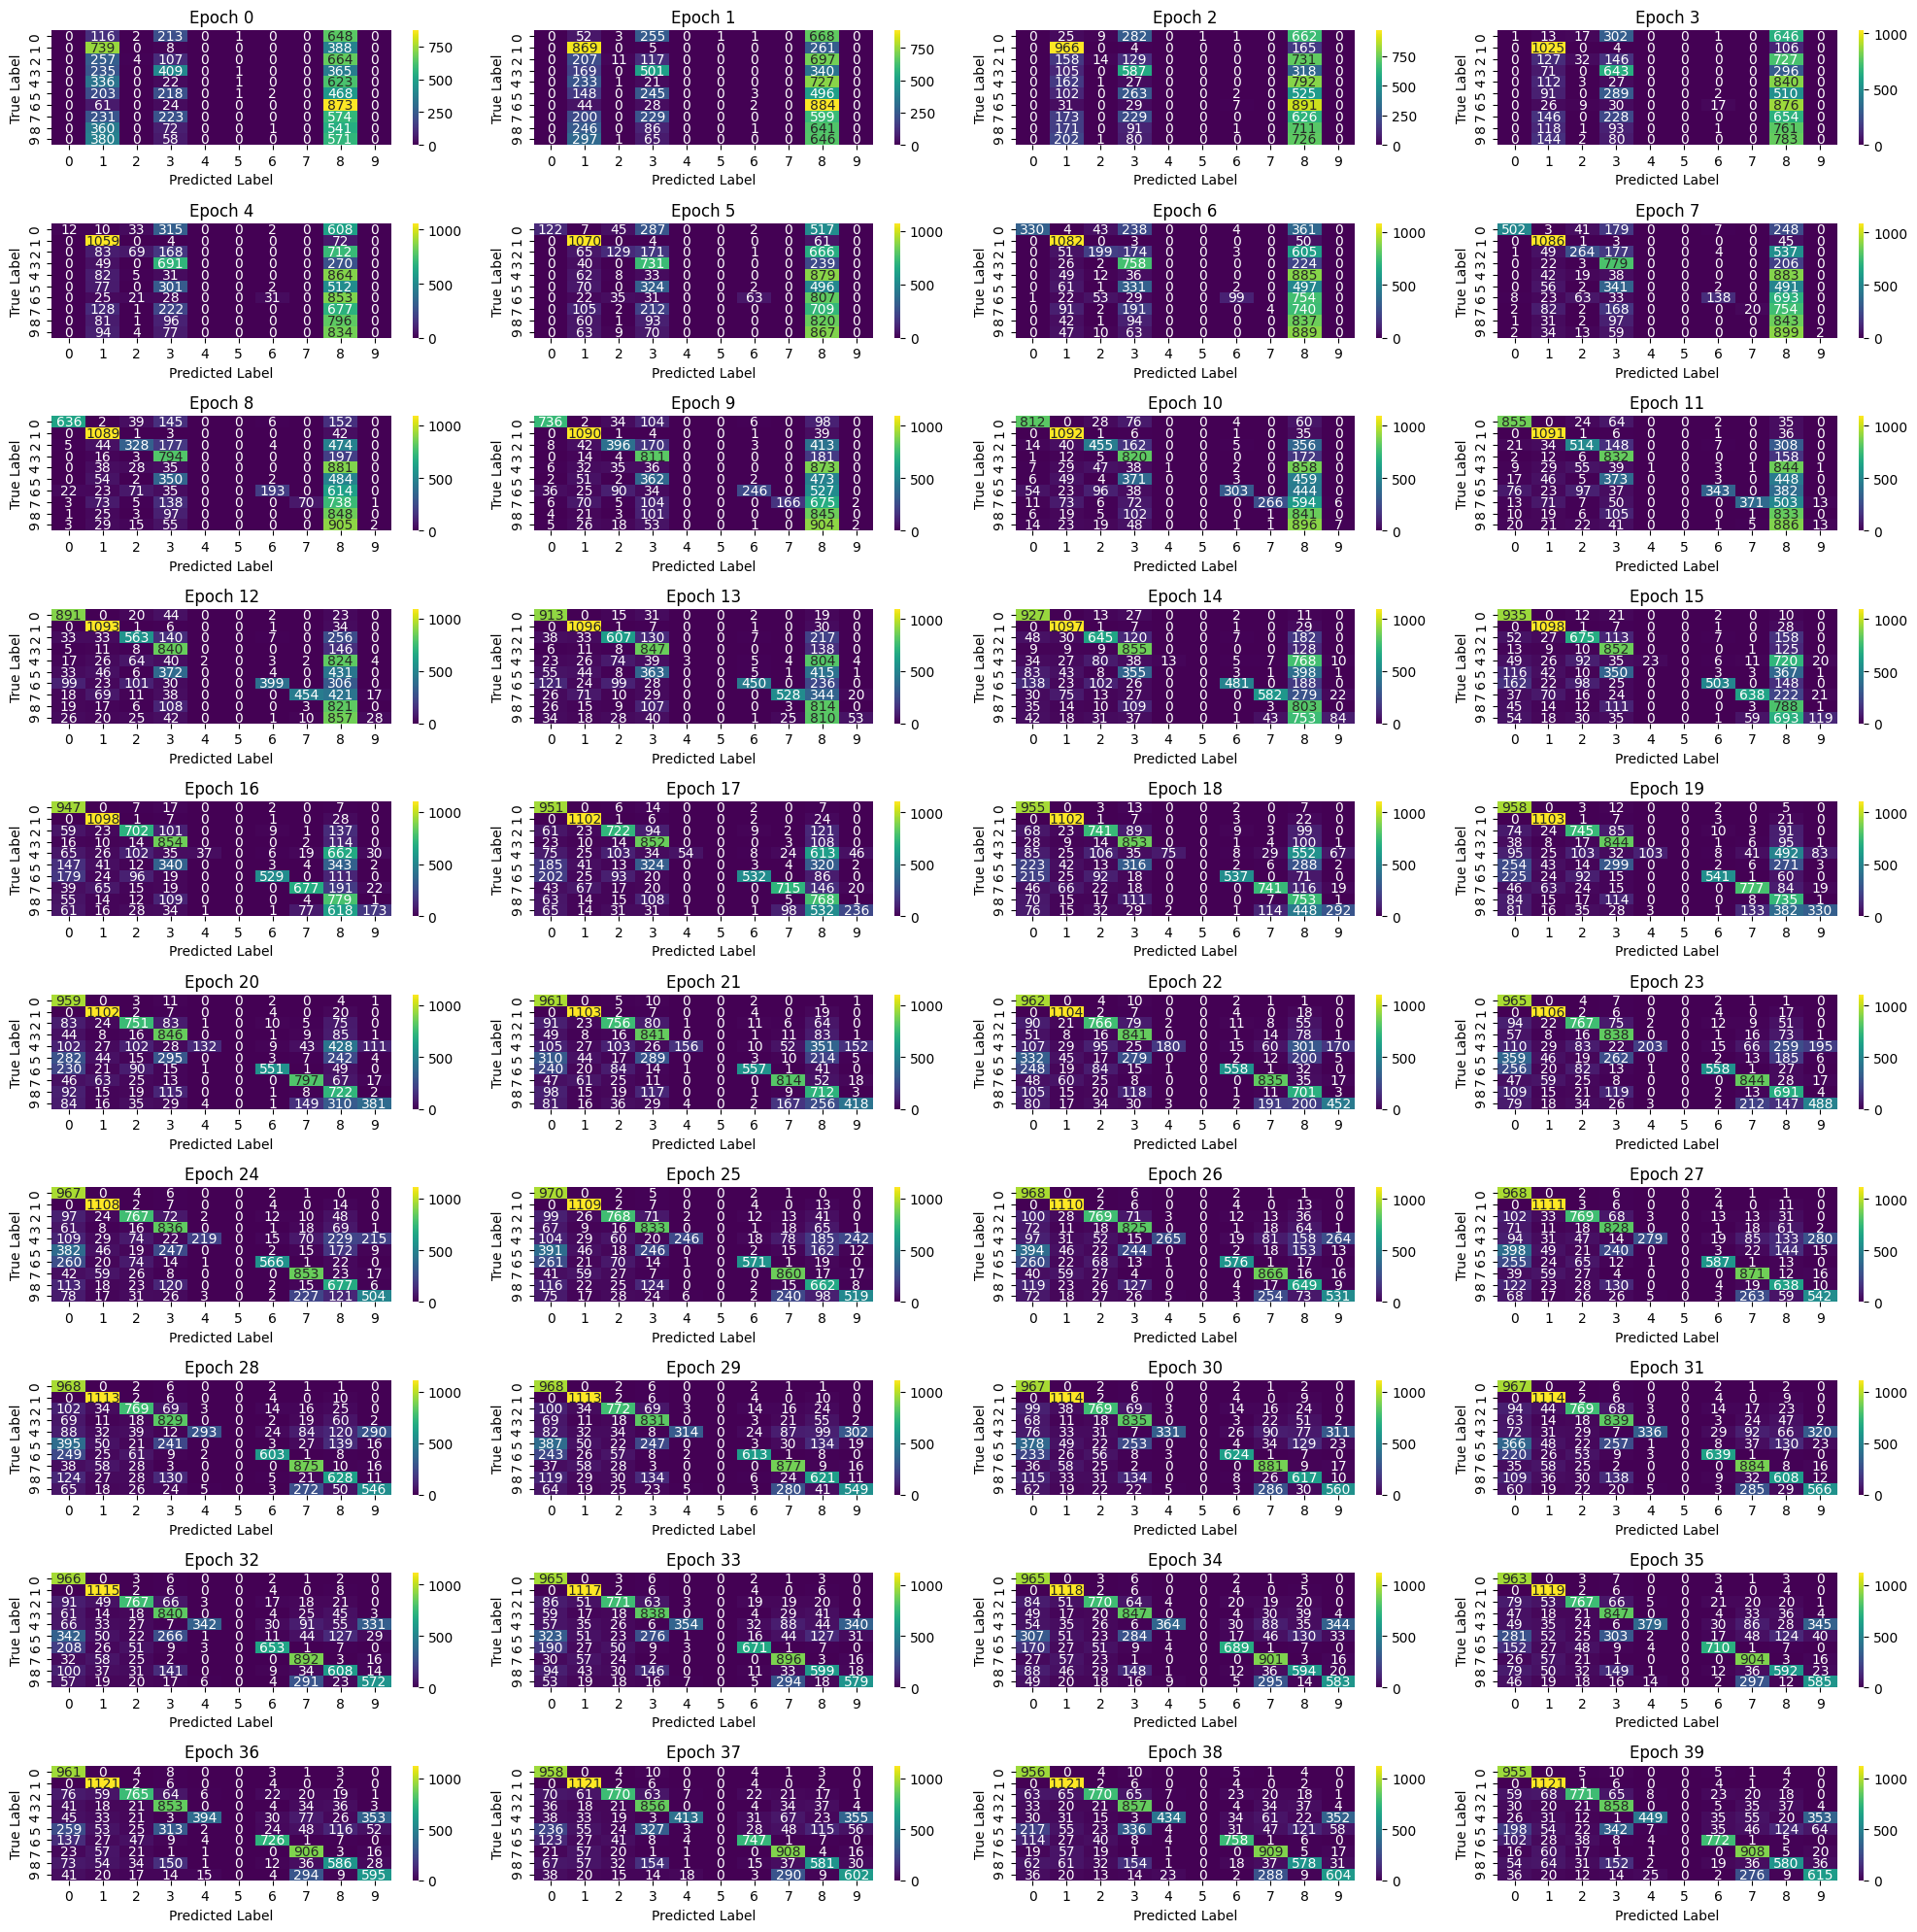

In [4]:

# Configurar la cuadrícula de subgráficos
fig, axes = plt.subplots(nrows=10, ncols=4, figsize=(20, 20))

# Iterar sobre los archivos y las ubicaciones de subgráficos
for i, ax in enumerate(axes.flatten()):
    # Crear el nombre del archivo
    file_name = f'logs/epoch_{i}_fase_0.txt'
    
    # Verificar si el archivo existe
    if os.path.exists(file_name):
        # Abre el archivo en modo de lectura ('r')
        with open(file_name, 'r') as archivo:
            # Lee el contenido del archivo
            contenido = archivo.read()
            
            # Convierte la expresión literal de Python en la estructura de datos original
            data = ast.literal_eval(contenido)

        # Extraer etiquetas reales y predicciones
        real_labels, predicted_labels = zip(*data)

        # Crear una matriz de confusión
        conf_matrix = confusion_matrix(real_labels, predicted_labels)

        # Crear un mapa de calor en el subgráfico actual
        sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='viridis',
                    xticklabels=set(real_labels), yticklabels=set(real_labels), ax=ax)

        # Añadir etiquetas a los ejes
        ax.set_xlabel('Predicted Label')
        ax.set_ylabel('True Label')
        ax.set_title(f'Epoch {i}')

# Ajustar diseño y mostrar el mosaico de mapas de calor
plt.tight_layout()
plt.show()


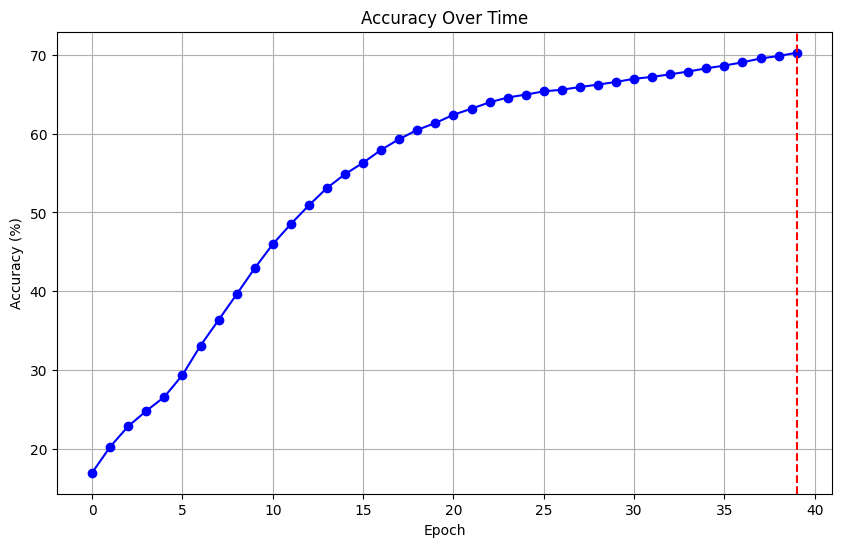

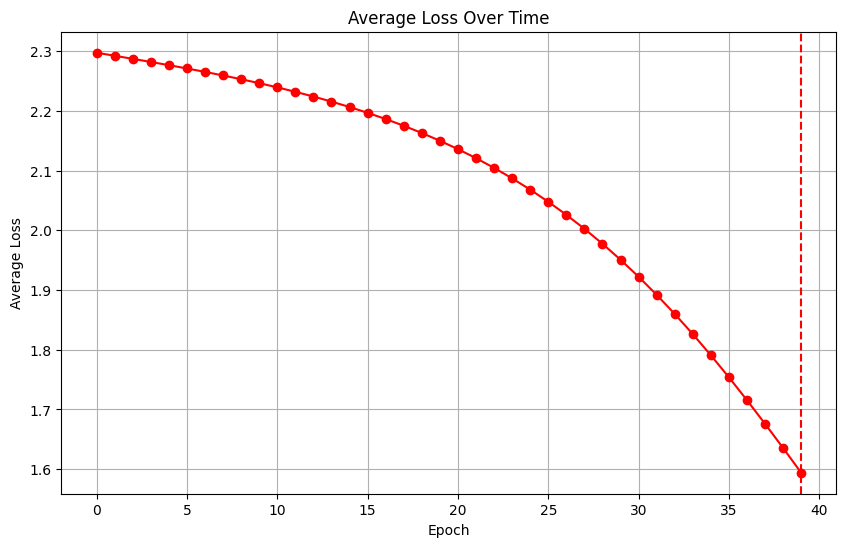

In [1]:
import matplotlib.pyplot as plt

# Abrir y leer el archivo
with open('logs/log_accuracy_loss.txt', 'r') as file:
    accuracy_loss_list = eval(file.read())

# Desempaquetar la lista en dos listas separadas
accuracies, avg_losses = zip(*accuracy_loss_list)



# Graficar la precisión (accuracy)
plt.figure(figsize=(10, 6))
plt.plot(accuracies, marker='o', linestyle='-', color='b')
plt.title('Accuracy Over Time')
plt.xlabel('Epoch')
plt.ylabel('Accuracy (%)')
plt.grid(True)
# Añadir línea vertical en la epoch 24
plt.axvline(x=39, color='r', linestyle='--', label='Epoch 39')
plt.show()

# Graficar la pérdida promedio (avg loss)
plt.figure(figsize=(10, 6))
plt.plot(avg_losses, marker='o', linestyle='-', color='r')
plt.title('Average Loss Over Time')
plt.xlabel('Epoch')
plt.ylabel('Average Loss')
plt.grid(True)

# Añadir línea vertical en la epoch 24
plt.axvline(x=39, color='r', linestyle='--', label='Epoch 39')

plt.show()
